In [30]:
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np

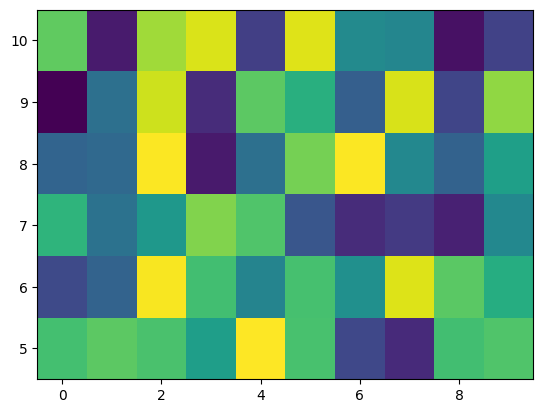

In [31]:
np.random.seed(19680801)
Z = np.random.rand(6, 10)
x = np.arange(-0.5, 10, 1)  # len = 11
y = np.arange(4.5, 11, 1)  # len = 8

fig, ax = plt.subplots()
ax.pcolormesh(x, y, Z)

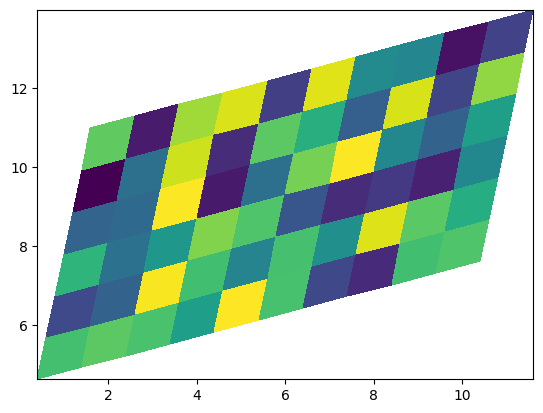

In [32]:
x = np.arange(-0.5, 10, 1)  # len = 11
y = np.arange(4.5, 11, 1)  # len = 7
X, Y = np.meshgrid(x, y)
X = X + 0.2 * Y  # tilt the coordinates.
Y = Y + 0.3 * X

fig, ax = plt.subplots()
ax.pcolormesh(X, Y, Z)

Text(0.5, 1.0, "shading='flat'")

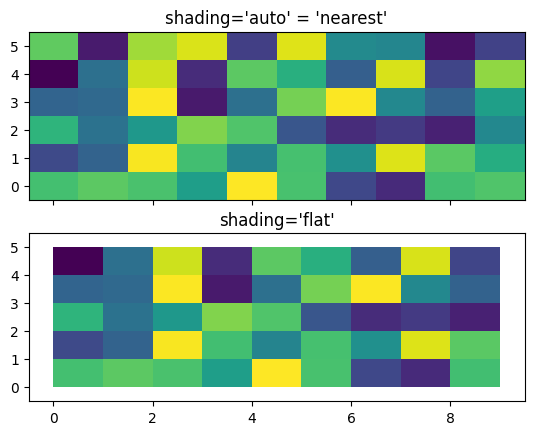

In [33]:
x = np.arange(10)  # len = 10
y = np.arange(6)  # len = 6
X, Y = np.meshgrid(x, y)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
axs[0].pcolormesh(X, Y, Z, vmin=np.min(Z), vmax=np.max(Z), shading='auto')
axs[0].set_title("shading='auto' = 'nearest'")
axs[1].pcolormesh(X, Y, Z[:-1, :-1], vmin=np.min(Z), vmax=np.max(Z),
                  shading='flat')
axs[1].set_title("shading='flat'")

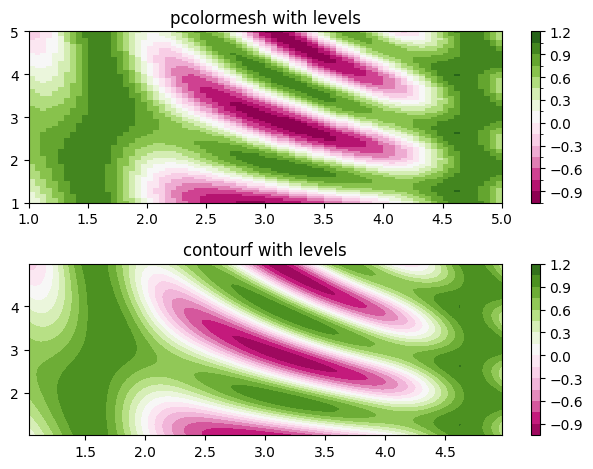

In [34]:
# make these smaller to increase the resolution
dx, dy = 0.05, 0.05

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(1, 5 + dy, dy),
                slice(1, 5 + dx, dx)]

z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)

# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())


# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.colormaps['PiYG']
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig, (ax0, ax1) = plt.subplots(nrows=2)

im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh with levels')


# contours are *point* based plots, so convert our bound into point
# centers
cf = ax1.contourf(x[:-1, :-1] + dx/2.,
                  y[:-1, :-1] + dy/2., z, levels=levels,
                  cmap=cmap)
fig.colorbar(cf, ax=ax1)
ax1.set_title('contourf with levels')

# adjust spacing between subplots so `ax1` title and `ax0` tick labels
# don't overlap
fig.tight_layout()

plt.show()